In [151]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from plotly.offline import init_notebook_mode
import matplotlib.pyplot as plt
%matplotlib inline

In [152]:
data = pd.read_csv("indian_food.csv")
data

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central


In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            255 non-null    object 
 1   ingredients     255 non-null    object 
 2   diet            255 non-null    object 
 3   prep_time       225 non-null    float64
 4   cook_time       227 non-null    float64
 5   flavor_profile  226 non-null    object 
 6   course          255 non-null    object 
 7   state           231 non-null    object 
 8   region          241 non-null    object 
dtypes: float64(2), object(7)
memory usage: 18.1+ KB


In [183]:
data.describe()

,prep_time,cook_time
count,225.000000,227.000000
mean,35.386667,38.911894
std,76.241081,49.421711
min,5.000000,2.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,45.000000
max,500.000000,720.000000


In [153]:
data.columns

Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region'],
      dtype='object')

In [154]:
data.isna()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
250,False,False,False,False,False,False,False,False,False
251,False,False,False,False,False,False,False,False,False
252,False,False,False,False,False,False,False,False,False
253,False,False,False,False,False,False,False,False,False


In [155]:
data.isna().any()

name              False
ingredients       False
diet              False
prep_time         False
cook_time         False
flavor_profile    False
course            False
state             False
region             True
dtype: bool

In [156]:
data['region'].values

array(['East', 'West', 'North', 'West', 'East', 'East', 'North', '-1',
       'East', '-1', '-1', 'North', '-1', 'North', 'East', 'North',
       'West', 'North', 'North', 'West', 'East', 'East', 'East', 'East',
       'East', 'East', 'North East', 'North', 'East', 'East', 'East',
       'North East', 'East', 'East', 'East', 'East', 'East', 'South',
       'South', 'West', 'South', 'South', 'South', 'South', 'South',
       'South', 'South', 'South', 'South', 'South', 'South', 'South',
       'South', 'South', 'South', 'West', 'West', 'West', 'West', 'West',
       'West', 'West', 'West', 'West', 'North East', 'North East',
       'North East', 'North East', 'North', 'North', 'North', 'North',
       'North', 'North', 'North', 'South', 'North', 'North', 'West',
       'East', 'North', 'North', 'North', 'West', 'East', 'North',
       'North', 'North', 'West', 'Central', 'North', 'North', 'North',
       'North', '-1', 'North', '-1', 'North', '-1', 'North', 'North',
       'North', 'Nor

In [157]:
data=data.replace(-1,np.nan)
data=data.replace('-1',np.nan)

In [158]:
data.isnull().sum()

name               0
ingredients        0
diet               0
prep_time         30
cook_time         28
flavor_profile    29
course             0
state             24
region            14
dtype: int64

In [159]:
data['state'].values

array(['West Bengal', 'Rajasthan', 'Punjab', 'Rajasthan', 'West Bengal',
       'West Bengal', 'Uttar Pradesh', nan, 'West Bengal', nan, nan,
       'Punjab', nan, 'Uttar Pradesh', 'Odisha', 'Uttar Pradesh',
       'Maharashtra', 'Uttarakhand', 'Uttar Pradesh', 'Maharashtra',
       'Odisha', 'Odisha', 'Odisha', 'West Bengal', 'Odisha',
       'West Bengal', 'Assam', 'Bihar', 'West Bengal', 'West Bengal',
       'West Bengal', 'Assam', 'Odisha', 'West Bengal', 'West Bengal',
       'West Bengal', 'West Bengal', 'Andhra Pradesh', 'Andhra Pradesh',
       'Maharashtra', 'Karnataka', 'Telangana', 'Andhra Pradesh',
       'Andhra Pradesh', 'Kerala', 'Karnataka', 'Karnataka',
       'Andhra Pradesh', 'Andhra Pradesh', 'Tamil Nadu', 'Andhra Pradesh',
       'Telangana', 'Telangana', 'Tamil Nadu', 'Andhra Pradesh',
       'Maharashtra', 'Gujarat', 'Maharashtra', 'Gujarat', 'Maharashtra',
       'Maharashtra', 'Maharashtra', 'Maharashtra', 'Maharashtra',
       'Assam', 'Tripura', 'Manipur', '

In [160]:
data.shape

(255, 9)

##  Total count of vegitarian & non vegitarian diet 

In [166]:
diet_data = data['diet'].value_counts().reset_index()
diet_data

,index,diet
0,vegetarian,226
1,non vegetarian,29


In [167]:
diet_data.columns = ['diet','count']

In [168]:
fig=px.pie(diet_data, values='count', names='diet', color_discrete_sequence=['green','red'])
fig.show()

In [144]:
cooking_time = data[['cook_time','name']]
cooking_time.head()

,cook_time,name
0,25.0,Balu shahi
1,30.0,Boondi
2,60.0,Gajar ka halwa
3,30.0,Ghevar
4,40.0,Gulab jamun


## Dishes that take less time to cook  

In [169]:
cooking_time=cooking_time.sort_values(['cook_time'],ascending=True)

In [170]:
cooking_time=cooking_time.head(20)
cooking_time

,cook_time,name
109,2.0,Pani puri
147,5.0,Papadum
111,5.0,Papad
11,5.0,Lassi
212,6.0,Lilva Kachori
78,10.0,Chapati
169,10.0,Bajri no rotlo
195,10.0,Koshimbir
207,10.0,Surnoli
190,10.0,Keri no ras


In [171]:
fig=px.bar(cooking_time,y='cook_time', x='name',color='name')
fig.show()

## Dishes that take more time to cook 

In [148]:
cooking_time=cooking_time.sort_values(['cook_time'],ascending=False)

In [149]:
cooking_time=cooking_time.head(20)
cooking_time

,cook_time,name
161,20.0,Uttapam
151,20.0,Pesarattu
17,20.0,Singori
67,15.0,Galho
138,15.0,Kootu
54,15.0,Kajjikaya
60,15.0,Modak
175,15.0,Chorafali
178,10.0,Kutchi dabeli
214,10.0,Khichu


In [150]:
fig=px.bar(cooking_time,y='cook_time', x='name', color='name')
fig.show()

In [22]:
data.columns

Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region'],
      dtype='object')

## Statewise vegetarian & non vegetarian food

In [172]:
vegDiet_data=data[data.diet=='vegetarian']
vegDiet_data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15.0,60.0,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.0,30.0,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.0,40.0,sweet,dessert,West Bengal,East


In [173]:
statewise_vegDiet_data = vegDiet_data['state'].value_counts().reset_index()
statewise_vegDiet_data.columns=['state','count']
statewise_vegDiet_data

,state,count
0,Gujarat,35
1,Punjab,28
2,Maharashtra,28
3,West Bengal,19
4,Tamil Nadu,19
5,Assam,11
6,Andhra Pradesh,10
7,Uttar Pradesh,9
8,Kerala,7
9,Odisha,7


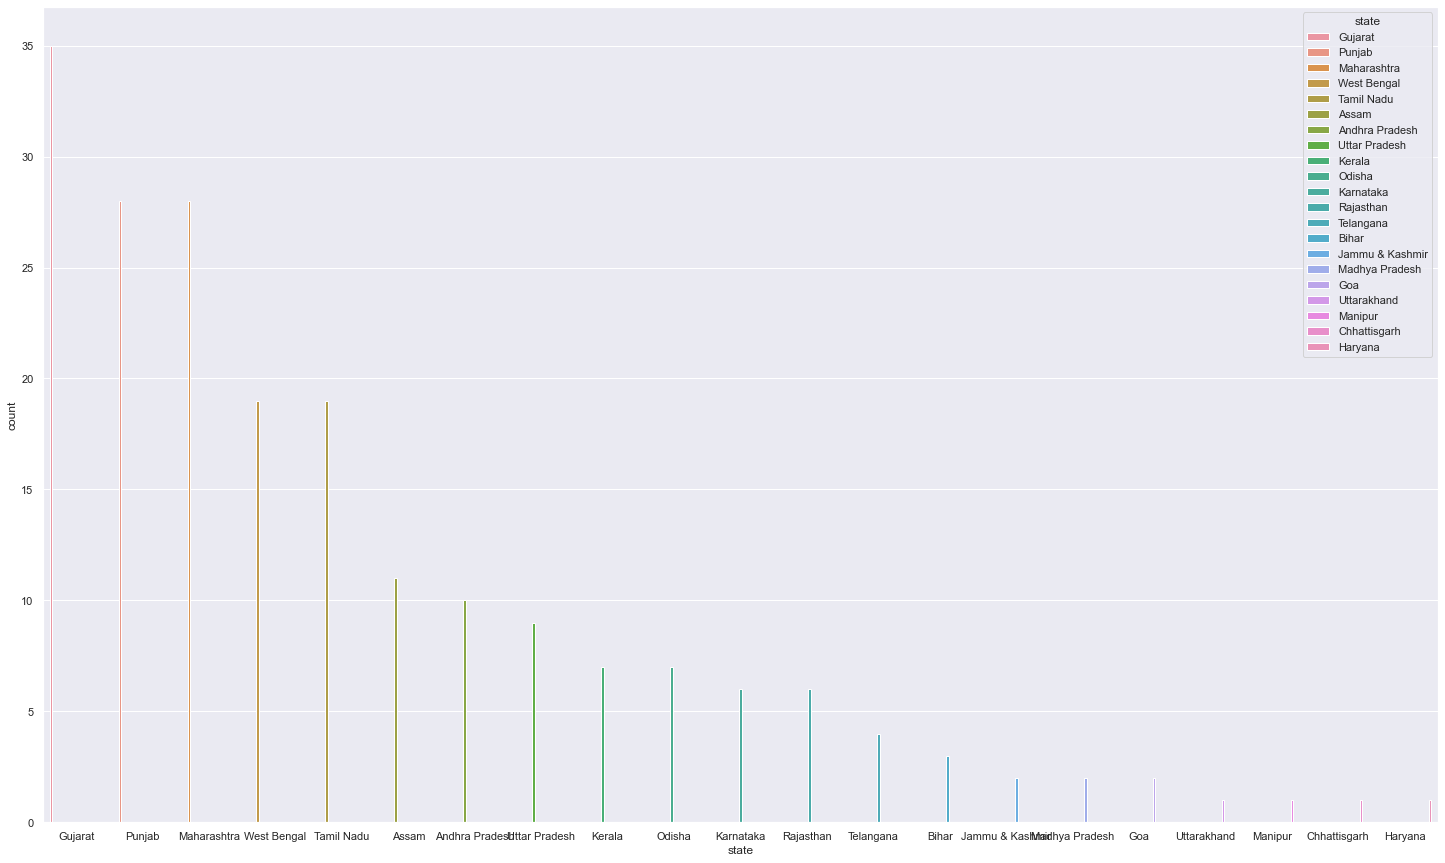

In [174]:
sns.set(rc={'figure.figsize':(25,15)})
sns.barplot(x="state",y='count',data=statewise_vegDiet_data,hue="state")
plt.show()

In [175]:
nonvegDiet_data=data[data.diet=='non vegetarian']
nonvegDiet_data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
64,Maach Jhol,"Fish, potol, tomato, chillies, ginger, garlic",non vegetarian,10.0,40.0,spicy,main course,Assam,North East
65,Pork Bharta,"Boiled pork, onions, chillies, ginger and garlic",non vegetarian,NaN,NaN,spicy,main course,Tripura,North East
67,Galho,"Rice, axone, salt, water, chillies, pork",non vegetarian,5.0,15.0,spicy,main course,Nagaland,North East
75,Biryani,"Chicken thighs, basmati rice, star anise, swee...",non vegetarian,30.0,120.0,spicy,main course,Telangana,South
76,Butter chicken,"Chicken, greek yogurt, cream, garam masala pow...",non vegetarian,10.0,35.0,spicy,main course,NCT of Delhi,North


In [176]:
statewise_nonvegDiet_data = nonvegDiet_data['state'].value_counts().reset_index()
statewise_nonvegDiet_data.columns=['state','count']
statewise_nonvegDiet_data

,state,count
0,Assam,10
1,West Bengal,5
2,Punjab,4
3,Maharashtra,2
4,Tripura,1
5,Nagaland,1
6,Telangana,1
7,NCT of Delhi,1
8,Kerala,1
9,Tamil Nadu,1


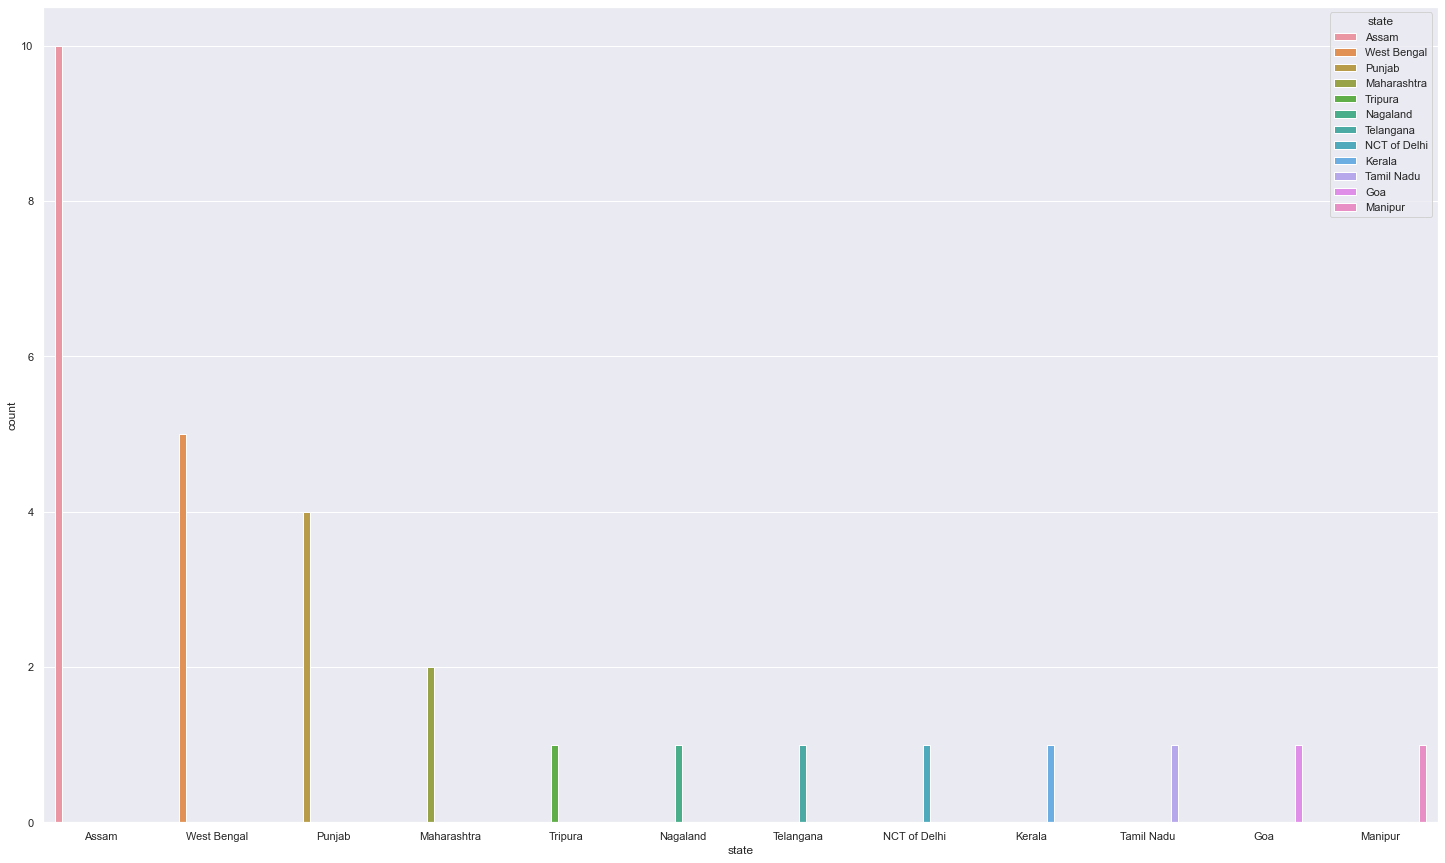

In [177]:
sns.set(rc={'figure.figsize':(25,15)})
sns.barplot(x="state",y='count',data=statewise_nonvegDiet_data,hue="state")
plt.show()

In [180]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            255 non-null    object 
 1   ingredients     255 non-null    object 
 2   diet            255 non-null    object 
 3   prep_time       225 non-null    float64
 4   cook_time       227 non-null    float64
 5   flavor_profile  226 non-null    object 
 6   course          255 non-null    object 
 7   state           231 non-null    object 
 8   region          241 non-null    object 
dtypes: float64(2), object(7)
memory usage: 18.1+ KB
